<a href="https://colab.research.google.com/github/HusnaMundambra/Flight_delay_prediction/blob/main/FLIGHT_DELAY_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Flight Delays**

The goal of this project is to build a model able to predict flight delays in the month of January. Take some time to understand the data, which airlines have the most percentage of delayed flights? Which airports have the most percentage of delayed flights? Is there any relationship between distance and delay?

**Importing Libraries**

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , recall_score ,  precision_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

**Load the dataset**

The data is taken from the kaggle.This data is collected from the Bureau of Transportation Statistics, Govt. of the USA. This data is open-sourced under U.S. Govt. Works. This dataset contains all the flights in the month of January 2019 . There are more than 400,000 flights in the month of January itself throughout the United States. The features were manually chosen to do a primary time series analysis. There are several other features available on their website.

This data could well be used to predict the flight delay at the destination airport specifically for the month of January in upcoming years as the data is for January only.

In [ ]:
#load the dataset
df=pd.read_csv("/content/Jan_2019_ontime.csv")
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [ ]:
df.count()

DAY_OF_MONTH             583985
DAY_OF_WEEK              583985
OP_UNIQUE_CARRIER        583985
OP_CARRIER_AIRLINE_ID    583985
OP_CARRIER               583985
TAIL_NUM                 581442
OP_CARRIER_FL_NUM        583985
ORIGIN_AIRPORT_ID        583985
ORIGIN_AIRPORT_SEQ_ID    583985
ORIGIN                   583985
DEST_AIRPORT_ID          583985
DEST_AIRPORT_SEQ_ID      583985
DEST                     583985
DEP_TIME                 567633
DEP_DEL15                567630
DEP_TIME_BLK             583985
ARR_TIME                 566924
ARR_DEL15                565963
CANCELLED                583985
DIVERTED                 583985
DISTANCE                 583985
Unnamed: 21                   0
dtype: int64

In [ ]:
df.shape

(583985, 22)

**Data preparing**

In [ ]:
#Drop similar columns
df=df.drop(['OP_UNIQUE_CARRIER','OP_CARRIER','TAIL_NUM','ORIGIN_AIRPORT_SEQ_ID','ORIGIN','DEST_AIRPORT_SEQ_ID','DEST','Unnamed: 21','DEP_TIME_BLK'],axis=1)
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,20363,3280,11953,10397,601.0,0.0,722.0,0.0,0.0,0.0,300.0
1,1,2,20363,3281,13487,11193,1359.0,0.0,1633.0,0.0,0.0,0.0,596.0
2,1,2,20363,3282,11433,11193,1215.0,0.0,1329.0,0.0,0.0,0.0,229.0
3,1,2,20363,3283,15249,10397,1521.0,0.0,1625.0,0.0,0.0,0.0,223.0
4,1,2,20363,3284,10397,11778,1847.0,0.0,1940.0,0.0,0.0,0.0,579.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 3   OP_CARRIER_FL_NUM      583985 non-null  int64  
 4   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 5   DEST_AIRPORT_ID        583985 non-null  int64  
 6   DEP_TIME               567633 non-null  float64
 7   DEP_DEL15              567630 non-null  float64
 8   ARR_TIME               566924 non-null  float64
 9   ARR_DEL15              565963 non-null  float64
 10  CANCELLED              583985 non-null  float64
 11  DIVERTED               583985 non-null  float64
 12  DISTANCE               583985 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 57.9 MB


In [ ]:
df.isnull().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
DEST_AIRPORT_ID              0
DEP_TIME                 16352
DEP_DEL15                16355
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [ ]:
#drop the missing values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
DEST_AIRPORT_ID          0
DEP_TIME                 0
DEP_DEL15                0
ARR_TIME                 0
ARR_DEL15                0
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

**Problem definition**.

Predict whether a particular flight will be delayed or not. The data refer to flights from January-19 , so we can use the data to predict flight delays in January for the next period (year-2020).

Binary classification problem.





21 variables per dataset.

Dataset with flights from Jan-19

Variable response is 'ARR_DEL15

In [ ]:
# Calculate the frequency of data in the "CANCELLED" column
frequency_canceled = df["CANCELLED"].value_counts()

# Show the result
frequency_canceled

0.0    565963
Name: CANCELLED, dtype: int64

In [ ]:
# Calculate the frequency of data in the "DEP_DEL15" column(15minutes)
frequency_DEP_DEL15 = df["DEP_DEL15"].value_counts()
# Show the result
frequency_DEP_DEL15

0.0    467658
1.0     98305
Name: DEP_DEL15, dtype: int64

In [ ]:
# Calculate the frequency of data in the "ARR_DEL15"(15minutes)
frequency_ARR_DEL15 = df["ARR_DEL15"].value_counts()
# Show the result
frequency_ARR_DEL15

0.0    460741
1.0    105222
Name: ARR_DEL15, dtype: int64

In [ ]:
# Calculate the frequency of data in the "DIVERTED" column
frequency_DIVERTED = df["DIVERTED"].value_counts()
# Show the result
frequency_DIVERTED

0.0    565963
Name: DIVERTED, dtype: int64

In [ ]:
#Drop useless columns
df=df.drop(['CANCELLED','DIVERTED'],axis=1)
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,DISTANCE
0,1,2,20363,3280,11953,10397,601.0,0.0,722.0,0.0,300.0
1,1,2,20363,3281,13487,11193,1359.0,0.0,1633.0,0.0,596.0
2,1,2,20363,3282,11433,11193,1215.0,0.0,1329.0,0.0,229.0
3,1,2,20363,3283,15249,10397,1521.0,0.0,1625.0,0.0,223.0
4,1,2,20363,3284,10397,11778,1847.0,0.0,1940.0,0.0,579.0


In [ ]:
# Make one column for delay either arrival or departure
# Using numpy.where()
df['Delay'] = np.where((df['DEP_DEL15'] >= 1.0) | (df['ARR_DEL15'] >= 1.0), 1, 0)
df.head()
# Calculate the frequency of data in the "Delay" column
df["Delay"].value_counts()

0    440724
1    125239
Name: Delay, dtype: int64

In [ ]:
#Drop old columns
df=df.drop(['DEP_DEL15','ARR_DEL15'],axis=1)


In [ ]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,ARR_TIME,DISTANCE,Delay
0,1,2,20363,3280,11953,10397,601.0,722.0,300.0,0
1,1,2,20363,3281,13487,11193,1359.0,1633.0,596.0,0
2,1,2,20363,3282,11433,11193,1215.0,1329.0,229.0,0
3,1,2,20363,3283,15249,10397,1521.0,1625.0,223.0,0
4,1,2,20363,3284,10397,11778,1847.0,1940.0,579.0,0


**Exploratory Data Analysis**

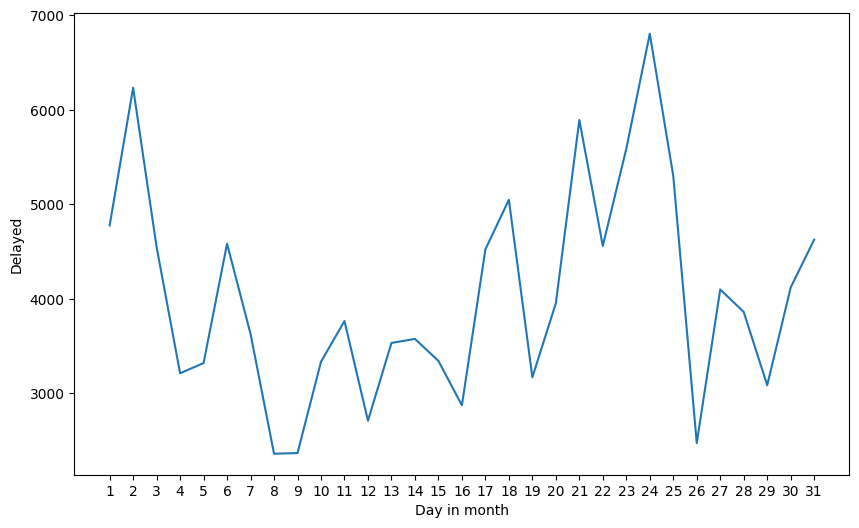

In [ ]:
#delay by day in month
monthly_days_delayed=df.groupby('DAY_OF_MONTH')['Delay'].apply(lambda x: (x==1).sum()).reset_index(name='Number Delayed')
plt.figure(figsize=(10, 6))
plt.xticks(monthly_days_delayed['DAY_OF_MONTH'])
plt.plot(monthly_days_delayed['DAY_OF_MONTH'],monthly_days_delayed['Number Delayed'])
plt.ylabel('Delayed')
plt.xlabel('Day in month')
plt.show()

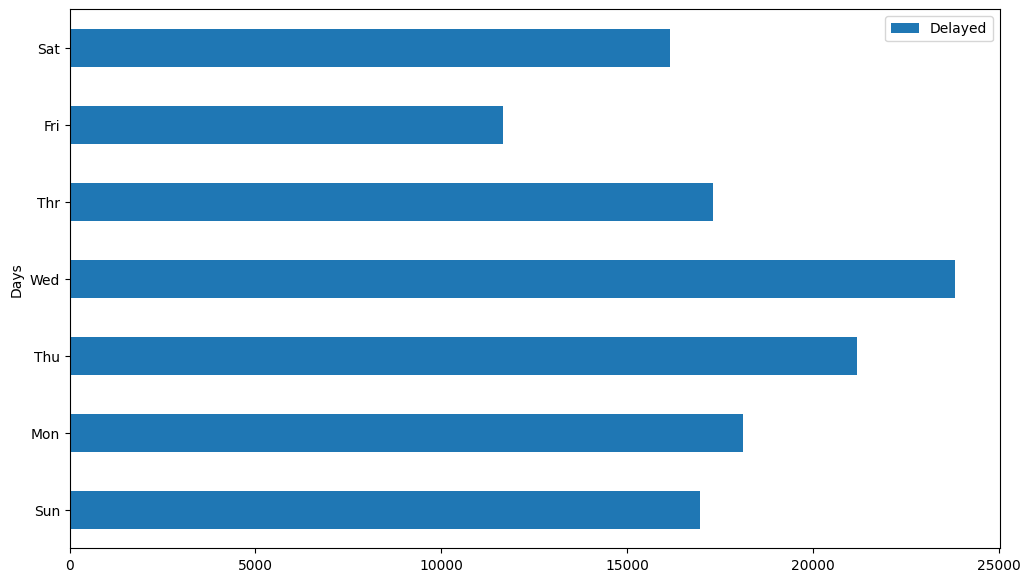

In [ ]:
#Let's see in which day are the higher number of delays:
# Create the data for the days adays_values
days_values = df.groupby('DAY_OF_WEEK')['Delay'].apply(lambda x: (x==1).sum()).reset_index(name='Number Delayed')
days_values.sort_values("DAY_OF_WEEK" )

days_values['DAY_OF_WEEK'] = days_values['DAY_OF_WEEK'].map({1: 'Sun', 2: 'Mon', 3:'Thu',4:'Wed',5:'Thr',6:'Fri',7:'Sat'})

df1= pd.DataFrame({'Days':days_values['DAY_OF_WEEK'],'Delayed':days_values['Number Delayed']})
ax = df1.plot.barh(x='Days',y='Delayed',figsize=(12,7))

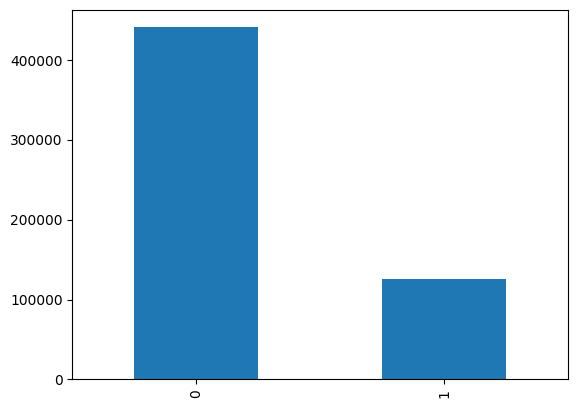

In [ ]:
df['Delay'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# Create a correlation matrix (optional step, depends on the data)
corr= df.corr()
corr

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,ARR_TIME,DISTANCE,Delay
DAY_OF_MONTH,1.000000,-0.021999,-0.001235,-0.012975,-0.006991,-0.006491,-0.001515,0.003527,-0.016014,0.033652
DAY_OF_WEEK,-0.021999,1.000000,0.005142,0.059897,0.007340,0.007051,0.003763,0.005355,0.017024,0.002527
OP_CARRIER_AIRLINE_ID,-0.001235,0.005142,1.000000,0.444965,-0.050297,-0.050544,0.005790,-0.019409,-0.125062,0.057824
OP_CARRIER_FL_NUM,-0.012975,0.059897,0.444965,1.000000,-0.058841,-0.063159,0.008770,0.004511,-0.342549,0.027840
ORIGIN_AIRPORT_ID,-0.006991,0.007340,-0.050297,-0.058841,1.000000,0.017099,-0.036038,-0.005878,0.093597,0.006857
DEST_AIRPORT_ID,-0.006491,0.007051,-0.050544,-0.063159,0.017099,1.000000,0.028878,0.021857,0.093237,0.015872
DEP_TIME,-0.001515,0.003763,0.005790,0.008770,-0.036038,0.028878,1.000000,0.672891,-0.026949,0.159708
ARR_TIME,0.003527,0.005355,-0.019409,0.004511,-0.005878,0.021857,0.672891,1.000000,0.020906,0.079396
DISTANCE,-0.016014,0.017024,-0.125062,-0.342549,0.093597,0.093237,-0.026949,0.020906,1.000000,0.023681
Delay,0.033652,0.002527,0.057824,0.027840,0.006857,0.015872,0.159708,0.079396,0.023681,1.000000


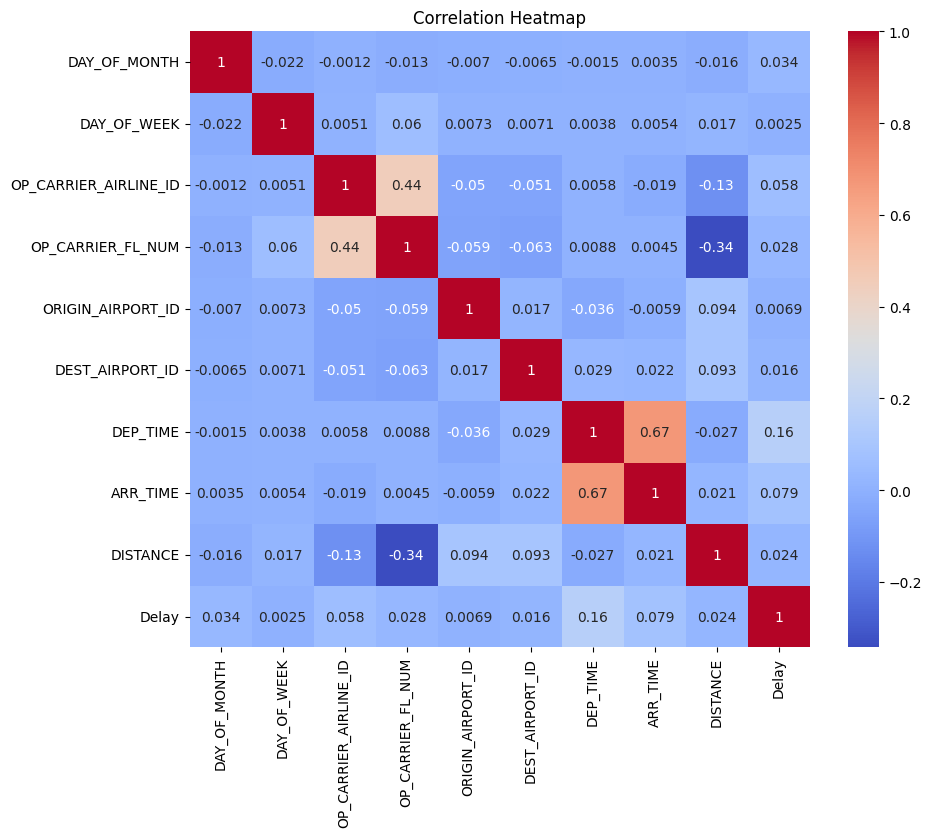

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**DATA SAMPLING**

In [ ]:
# Sampling
sampled_data = df.sample(n=100000, random_state=42)  # Sample a subset for initial exploration


**Data preprocessing**

In [ ]:
#Data splitting
x=sampled_data .iloc[:,:-1].values
y=sampled_data .Delay

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**SCALING DATA**

In [ ]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

**BALANCING DATA**

In [ ]:
# Import the necessary libraries SMOTE over sampling
from imblearn.over_sampling import SMOTE
# Creating an instance of SMOTE
smote = SMOTE()
# Balancing the data
xs_re, ys_re= smote.fit_resample(X_train_scaled, y_train)


**FEATURE SELECTION**

In [ ]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(xs_re, ys_re)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)


# Print the selected feature names
print("Selected features:", selected_indices)

Selected features: [0 2 3 6 7]


In [ ]:
#randomForest
# Model training
model = RandomForestClassifier(criterion= 'gini', max_depth=20, max_features= 'sqrt', n_estimators= 100)
model.fit(X_train_selected, ys_re)

RandomForestClassifier(max_depth=20)

In [ ]:
#Model evaluation
X_test_selected = selector.transform(X_test_scaled)
y_pred = model.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7633333333333333
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     23325
           1       0.46      0.37      0.41      6675

    accuracy                           0.76     30000
   macro avg       0.65      0.62      0.63     30000
weighted avg       0.75      0.76      0.75     30000



In [ ]:
#DecisionTree
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, random_state=42)
model2.fit(X_train_selected, ys_re)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)

In [ ]:
#Model evaluation
y_pred2 = model2.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.6857
              precision    recall  f1-score   support

           0       0.82      0.76      0.79     23325
           1       0.33      0.41      0.37      6675

    accuracy                           0.69     30000
   macro avg       0.58      0.59      0.58     30000
weighted avg       0.71      0.69      0.70     30000



In [ ]:
#Supportvectorclassifier
model3 = SVC(kernel='linear', C=1.0, random_state=0)
model3.fit(X_train_selected, ys_re)

SVC(kernel='linear', random_state=0)

In [ ]:
#Model evaluation
y_pred3 = model3.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

Accuracy: 0.5690666666666667
              precision    recall  f1-score   support

           0       0.84      0.56      0.67     23325
           1       0.28      0.62      0.39      6675

    accuracy                           0.57     30000
   macro avg       0.56      0.59      0.53     30000
weighted avg       0.71      0.57      0.61     30000



In [ ]:
#Logistic regression
model4=LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, multi_class='ovr', class_weight=None, random_state=None)
model4.fit(X_train_selected, ys_re)

LogisticRegression(multi_class='ovr')

In [ ]:
#Model evaluation
y_pred4 = model4.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

Accuracy: 0.5849333333333333
              precision    recall  f1-score   support

           0       0.83      0.59      0.69     23325
           1       0.29      0.58      0.38      6675

    accuracy                           0.58     30000
   macro avg       0.56      0.58      0.53     30000
weighted avg       0.71      0.58      0.62     30000



In [ ]:
#kNN
model5=KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train_selected, ys_re)

KNeighborsClassifier()

In [ ]:
#Model evaluation
y_pred5 = model5.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

Accuracy: 0.6353666666666666
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     23325
           1       0.32      0.54      0.40      6675

    accuracy                           0.64     30000
   macro avg       0.58      0.60      0.57     30000
weighted avg       0.72      0.64      0.66     30000



In [ ]:
#Gaussian
model6=GaussianNB()
model6.fit(X_train_selected, ys_re)

GaussianNB()

In [ ]:
#Model evaluation
y_pred6 = model6.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

Accuracy: 0.6038333333333333
              precision    recall  f1-score   support

           0       0.83      0.62      0.71     23325
           1       0.29      0.55      0.38      6675

    accuracy                           0.60     30000
   macro avg       0.56      0.59      0.55     30000
weighted avg       0.71      0.60      0.64     30000



**HYPERPARAMETER**

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
# Define a parameter grid to search over
param_grid = {'n_estimators':[10, 20, 30],'max_features':['sqrt', 'log2'],'max_depth':[4, 6, 8, 10],'criterion':['gini', 'entropy']}
# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf,
param_grid=param_grid, cv=10,
scoring='accuracy')
# Fit GridSearchCV to the training data
grid_search.fit(X_train_selected, ys_re)
# Print the best parameters found by GridSearchCV
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30}


In [ ]:
# Use the best estimator to make predictions on the test set
y_pred5 =grid_search.best_estimator_.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

Accuracy: 0.6925
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     23325
           1       0.36      0.50      0.42      6675

    accuracy                           0.69     30000
   macro avg       0.60      0.62      0.61     30000
weighted avg       0.73      0.69      0.71     30000



**VISUALIZATION**

**ROC-CURVE**

Plot the Receiver Operating Characteristic (ROC) curve to visualize the trade-off between true positive rate and false positive rate across different threshold values. This is particularly useful for binary classification problems

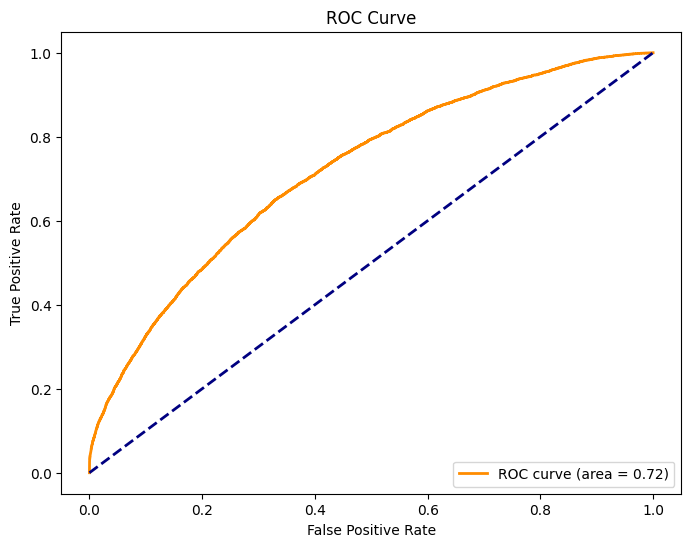

In [ ]:
# Visualize ROC Curve
from sklearn.metrics import roc_curve,precision_recall_curve, auc
# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test_selected)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

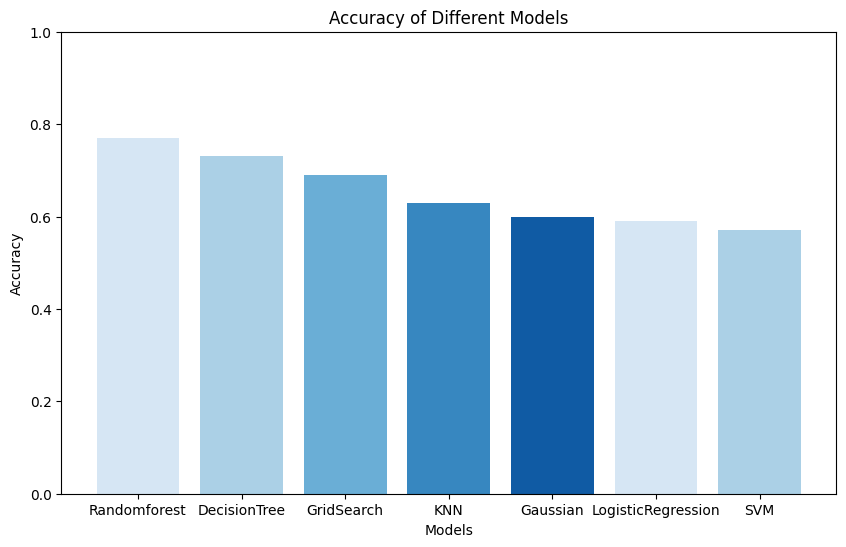

In [ ]:
# Define the models and their accuracy scores
models = ['Randomforest','DecisionTree',"GridSearch","KNN",'Gaussian','LogisticRegression','SVM']
accuracy_scores = [0.77,0.73,0.69,0.63,0.60,0.59,0.57 ]
# Define colors for each model
colors = sns.color_palette("Blues", 5)
# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

In [ ]:
ensemble=VotingClassifier(estimators=[('rf',model),('Decisiontree',model2)],voting='soft')
ensemble.fit(X_train_selected, ys_re)
ensemble_pred=ensemble.predict(X_test_selected)

In [ ]:
#Model Evaluation
print("Accuracy:", accuracy_score(y_test, ensemble_pred))
print(classification_report(y_test, ensemble_pred))

Accuracy: 0.7438666666666667
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     23325
           1       0.42      0.39      0.40      6675

    accuracy                           0.74     30000
   macro avg       0.62      0.62      0.62     30000
weighted avg       0.74      0.74      0.74     30000



**MODEL DEPLOYMENT**

In [ ]:
import pickle
import bz2

In [ ]:
pickle.dump(model,open("flight.pkl.bz2",'wb'))

In [ ]:
pickle_model=pickle.load(open('flight.pkl.bz2','rb'))

In [ ]:
selecting_data=X_train_selected[100].reshape(1,-1)

In [ ]:
pickle_model.predict(selecting_data)

array([0])

In [ ]:
with bz2.open('flight.pkl.bz2', 'wb') as f:
    pickle.dump(pickle_model, f)